# ニューラルネットワーク

- ニューラルネットワークでは、活性化関数としてシグモイド関数やReLU関数のような滑らかに変化する関数（非線形関数）を利用する
    - 層を重ねる恩恵を得るため。線形関数（ここではステップ関数）だと、層を重ねても意味がない
    - パーセプトロンとニューラルネットワークの違いは、利用する活性化関数の違いだけ
        - パーセプトロンは活性化関数にステップ関数を利用している
$$
y = h(b + w_1x_1 + w_2x_2) \\
h(x) = \left\{
    \begin{array}{ll}
        0 & (x <= 0) \\
        1 & (x > 0)
    \end{array}
\right.
$$
        - ニューラルネットワークは活性化関数にシグモイド関数を利用している
$$
h(x) = \frac{1}{1 + exp(-x)} \\
e = 2.7182・・・（ネイピア数）
$$
        - ニューラルネットワークは最近ではシグモイド関数の代わりにReLU関数を利用している
$$
h(x) = \left\{
    \begin{array}{ll}
        x & (x > 0) \\
        0 & (x <= 0)
    \end{array}
\right.
$$


- NumPyの多次元配列をうまく使うことで、ニューラルネットワークを効率よく実装することができる
- 機械学習の問題は、回帰問題と分類問題に大別できる
- 出力層で使用する活性化関数は、回帰問題では恒等関数、分類問題ではソフトマックス関数を一般的に利用する
- 分類問題では、出力層のニューロンの数を分類するクラス数に設定する
- 入力データのまとまりをバッチと言い、バッチ単位で推論処理を行うことで、計算を高速に行うことができる

## ステップ関数、シグモイド関数、ReLU関数

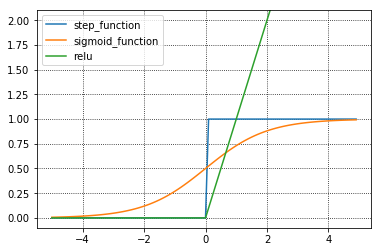

In [4]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
#     y = x > 0
#     return y.astype(np.int)
    return np.array(x > 0, dtype = np.int)


def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


if __name__ == '__main__':
    X = np.arange(-5.0, 5.0, 0.1)
    
    Y = step_function(X)
    plt.plot(X, Y, label='step_function')

    Y = sigmoid_function(X)
    plt.plot(X, Y, label='sigmoid_function')
    
    Y = relu(X)
    plt.plot(X, Y, label='relu')
    
    plt.grid(which='major',color='black',linestyle=':')
    plt.grid(which='minor',color='black',linestyle=':')
    plt.legend()
    plt.ylim(-0.1, 2.1)  # 図で描画するy軸の範囲を指定
    plt.show()